#Análisis Exploratorio de Dato - Titanic

Andrea Mestizo Hernández - A01735773

16 Febrero 2026

##*Introducción*

El Titanic es uno de los naufragios más infames de la historia. Fue una tragedia marítima del siglo XX protagonizada por un barco que se promocionaba como "insumergible" y el más lujoso de su tiempo, por lo que su hundimiento fue un evento impactante e inesperado que sacudió al mundo.

Analizar este dataset es interesante porque nos permite ir más allá de los números y contextualizar una catástrofe humana. El objetivo principal de este análisis es cuestionar, a través de los datos, si en medio del caos todas las vidas tuvieron realmente el "mismo valor". Específicamente, buscando patrones de correlación para determinar si variables como la clase social o el precio pagado por su ticket fueron factores determinantes para la supervivencia.

##*Parte 1 - Variación*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Primeras filas
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


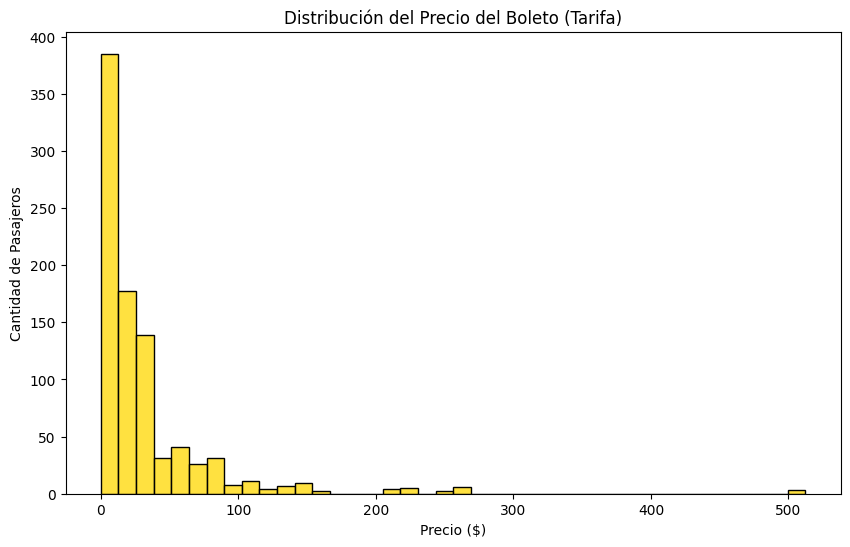

Tarifa más alta pagada: $512.3292


In [ ]:
# Histograma de distribución de la Tarifa (Fare)
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Fare'], bins=40, color='gold')
plt.title('Distribución del Precio del Boleto (Tarifa)')
plt.xlabel('Precio ($)')
plt.ylabel('Cantidad de Pasajeros')
plt.show()

# Detectar outliers extremos
print(f"Tarifa más alta pagada: ${titanic['Fare'].max()}")
#print(titanic['Fare'].describe())

Con este histograma podemos ver claramente que el barco estaba económicamente polarizado en su totalidad, con la mayoría de pasajeros concentrados en tarifas más bajas, de menos de \$50, mientras que hay una cola de valores atípicos que llegan hasta los \$512.
Sin duda, la brecha que hay entre los datos simboliza a la desigualdad económica que existía en el barco.

Si mi hipótesis es correcta, entonces significaría que la mayor cantidad de supervivientes se encuentran entre las personas que pagaron tarifas más altas, ya sea porque tenían acceso más fácil a lanchas o a salidas rápidas o porque se les dio prioridadal salvarlos. Esto lo podremos seguir analizando según nuestras otras variables.

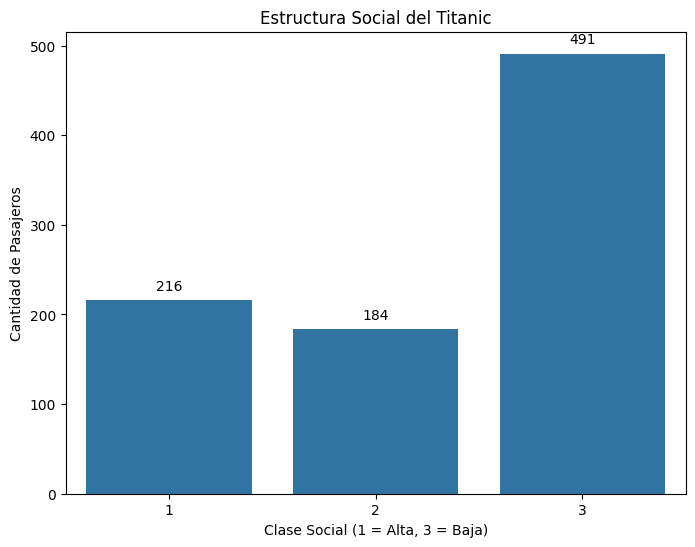

In [ ]:
# Conteo de Pclass (Clase Social)
plt.figure(figsize=(8, 6))

# Countplot para ver cuánta gente había en cada nivel
ax = sns.countplot(data=titanic, x='Pclass')

plt.title('Estructura Social del Titanic')
plt.xlabel('Clase Social (1 = Alta, 3 = Baja)')
plt.ylabel('Cantidad de Pasajeros')

#Conteo arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

La base de datos nos proporciona la clase social de cada pasajero. Podemos reforzar la información de la gráfica pasada notando que la mayor cantidad de pasajeros del barco tenían una clase social baja y una gran parte se encontraban en clase social media, sin embargo, la cantidad de personas con clase alta demuestra ser considerable. Para poder obtener más insights de la información es necesario realizar un análisis de correlación entre ambas variables para confirmar la teoría de que los pasajeros con la clase social más alta, pagaron lo boletos más caros, y a su vez, comprobar si fueron los que tuvieron más posibilidades de sobrevivir.

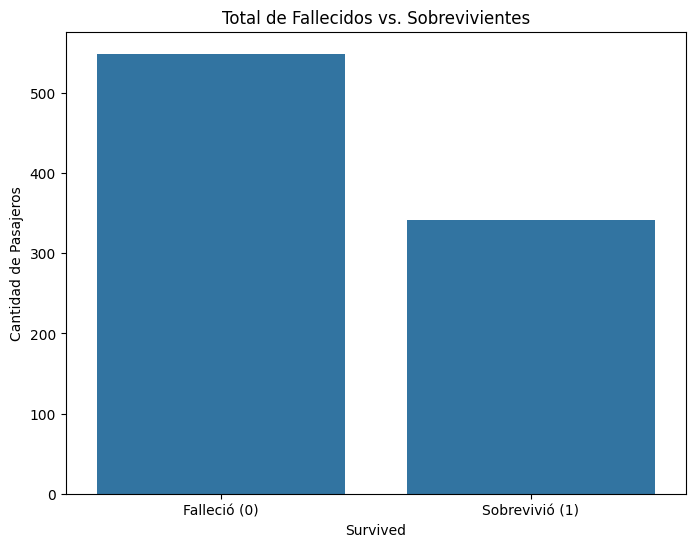

Porcentaje de supervivencia: 38.38%


In [ ]:
# Conteo de Supervivientes
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='Survived')
plt.title('Total de Fallecidos vs. Sobrevivientes')
plt.xticks([0, 1], ['Falleció (0)', 'Sobrevivió (1)'])
plt.ylabel('Cantidad de Pasajeros')
plt.show()

# Porcentaje exacto
sobrevivientes = titanic['Survived'].mean() * 100
print(f"Porcentaje de supervivencia: {sobrevivientes:.2f}%")

Esta gráfica busca hacer un conteo y una rápida comparación entre la cantidad de personas que fallecieron y sobrevivieron en el accidente. Los datos confirman que muy poca gente sobrevivió y que si la posibilidad de supervivencia era baja desde un inicio. Si se encuentra alguna correlación entre la clase social o el precio pagado por su boleto y la supervivencia de la persona, implicaría datos fuera de la desviación estándar que vale la pena analizar y que podría confirmar la hipótesis inicial.

##*Parte 2 - Covariación*

¿La tasa de supervivencia fue diferente para cada clase social?

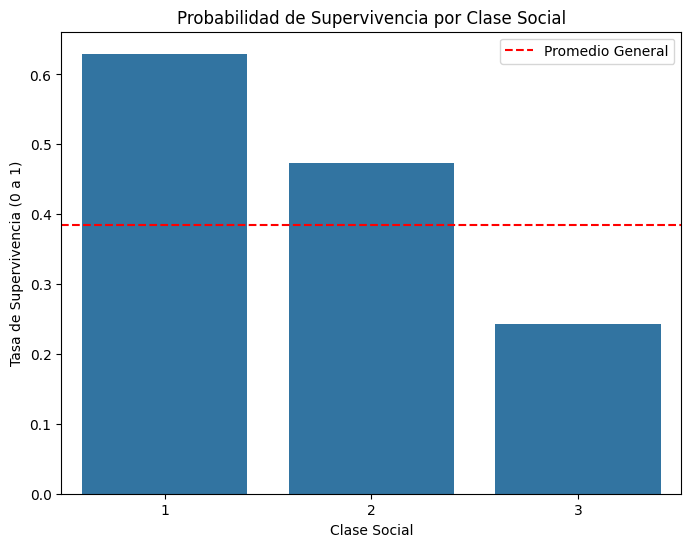

In [ ]:
# Gráfico de barras clase social vs supervivencia

plt.figure(figsize=(8, 6))

# Barplot calcula el promedio de la tasa de supervivencia
sns.barplot(data=titanic, x='Pclass', y='Survived', errorbar=None)

plt.title('Probabilidad de Supervivencia por Clase Social')
plt.ylabel('Tasa de Supervivencia (0 a 1)')
plt.xlabel('Clase Social')

# Línea roja para mostrar el promedio general (38%)
plt.axhline(titanic['Survived'].mean(), color='red', linestyle='--', label='Promedio General')
plt.legend()

plt.show()

Este gráfico de barras nos permite ver, con su forma de escalera, que a pesar de tener la mayor concentración de pasajeros en la clase social 3, los que tuvieron una mayor posibilidad de supervivencia, muy por encima del promedio general, fueron los de clase social alta. Con esto podemos suponer que el protocolo de evacuación no fue igual para todas las personas y su clase social pudo tener algún tipo de influencia.

¿La tarifa pagada por el ticket tiene alguna relación con la supervivencia?

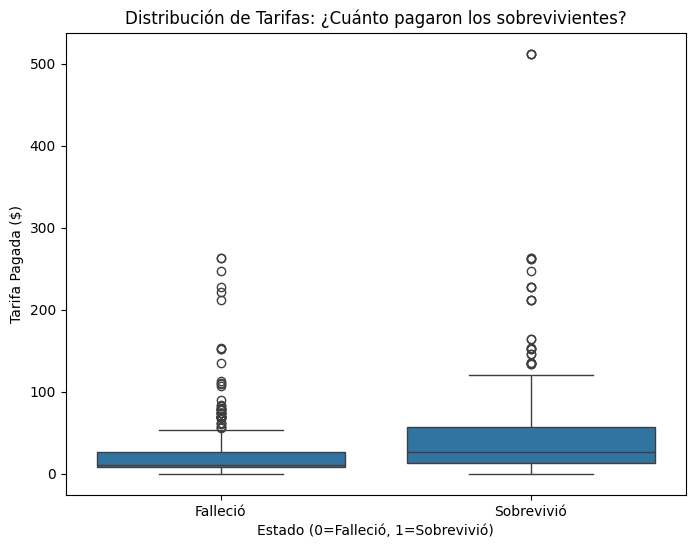

In [ ]:
# Boxplot tarifa vs supervivencia

plt.figure(figsize=(8, 6))

# Boxplot para ver la mediana y los rangos de precio
sns.boxplot(data=titanic, x='Survived', y='Fare')

plt.title('Distribución de Tarifas: ¿Cuánto pagaron los sobrevivientes?')
plt.ylabel('Tarifa Pagada ($)')
plt.xlabel('Estado (0=Falleció, 1=Sobrevivió)')
plt.xticks([0, 1], ['Falleció', 'Sobrevivió'])


plt.show()

El boxplot nos permite observar las tendencias de la tasa de supervivencia según la tarifa del ticket. Aquí podemos ver que la caja de personas fallecidas se encuentra con tarifas concentradas y una media más baja que el de supervivientes. Aunque podemos observar que hay muchos valores atípicos que se salen de los quartiles principales, hay una gran diferencia en la concentración de los datos. De igual manera, podemos ver que los supervivientes abarcan a gente que pagó una tarifa más alta, incluyendo al valor atípico del ticket con tarifa más alta. Esto puede darnos a entender que con un precio más alto de ticket, había ciertas preferencias com camarotes mejor posicionados y que no se llenaron de agua al instante o mejor acceso a rutas de evacuación.

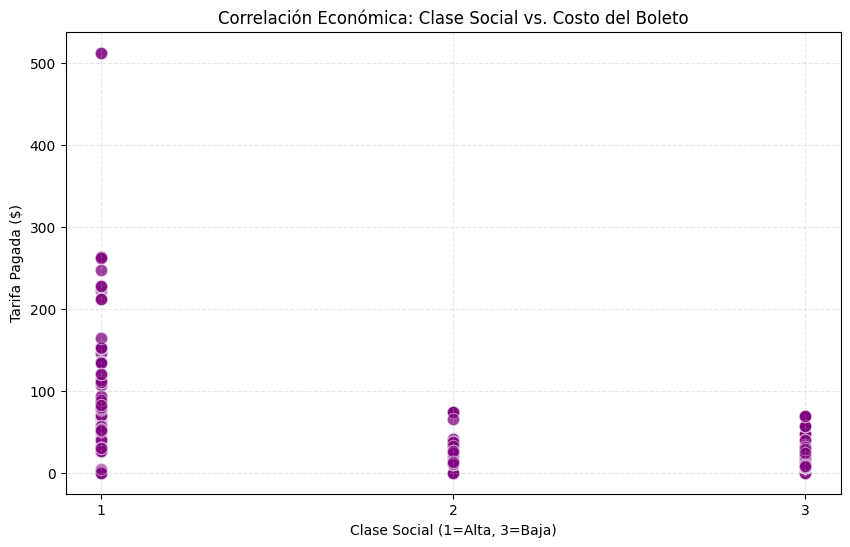

Correlación matemática entre Clase y Tarifa: -0.55


In [ ]:
# Scatter plot de relación entre clase social y tarifa pagada

plt.figure(figsize=(10, 6))

sns.scatterplot(data=titanic, x='Pclass', y='Fare', s=80, alpha=0.5, color='purple')

plt.title('Correlación Económica: Clase Social vs. Costo del Boleto')
plt.ylabel('Tarifa Pagada ($)')
plt.xlabel('Clase Social (1=Alta, 3=Baja)')
plt.xticks([1, 2, 3])
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

# Correlación exacta
print(f"Correlación matemática entre Clase y Tarifa: {titanic['Pclass'].corr(titanic['Fare']):.2f}")

El scatter plot confirma nuestra teoría inicial de que las personas con mayor clase social pagaban tickets más caros. Mientras que en clase social baja y media, nadie pagó más de \$10 por un ticket, en clase social alta pagaron tarifas altas con valores atípicos que se encuentran arriba de \$200 y \$500.
El coeficiente que nos da la correlación, aunque no es muy alto debido a la cantidad de gente de clase alta que compró tickets por abajo de los \$100, si nos demuestra que ambas variables tienen cierta correlación negativa entre ellas, esto se debe a que a menor clase social (3 - el número asignado es mayor al 1), el precio que pagaron por el ticket fue menor. A su vez, esto confirma que la segregación social en el barco, era sobre todo económica y denotaba status y poder.


##*Parte 3 - Valores Faltantes*

<Axes: >

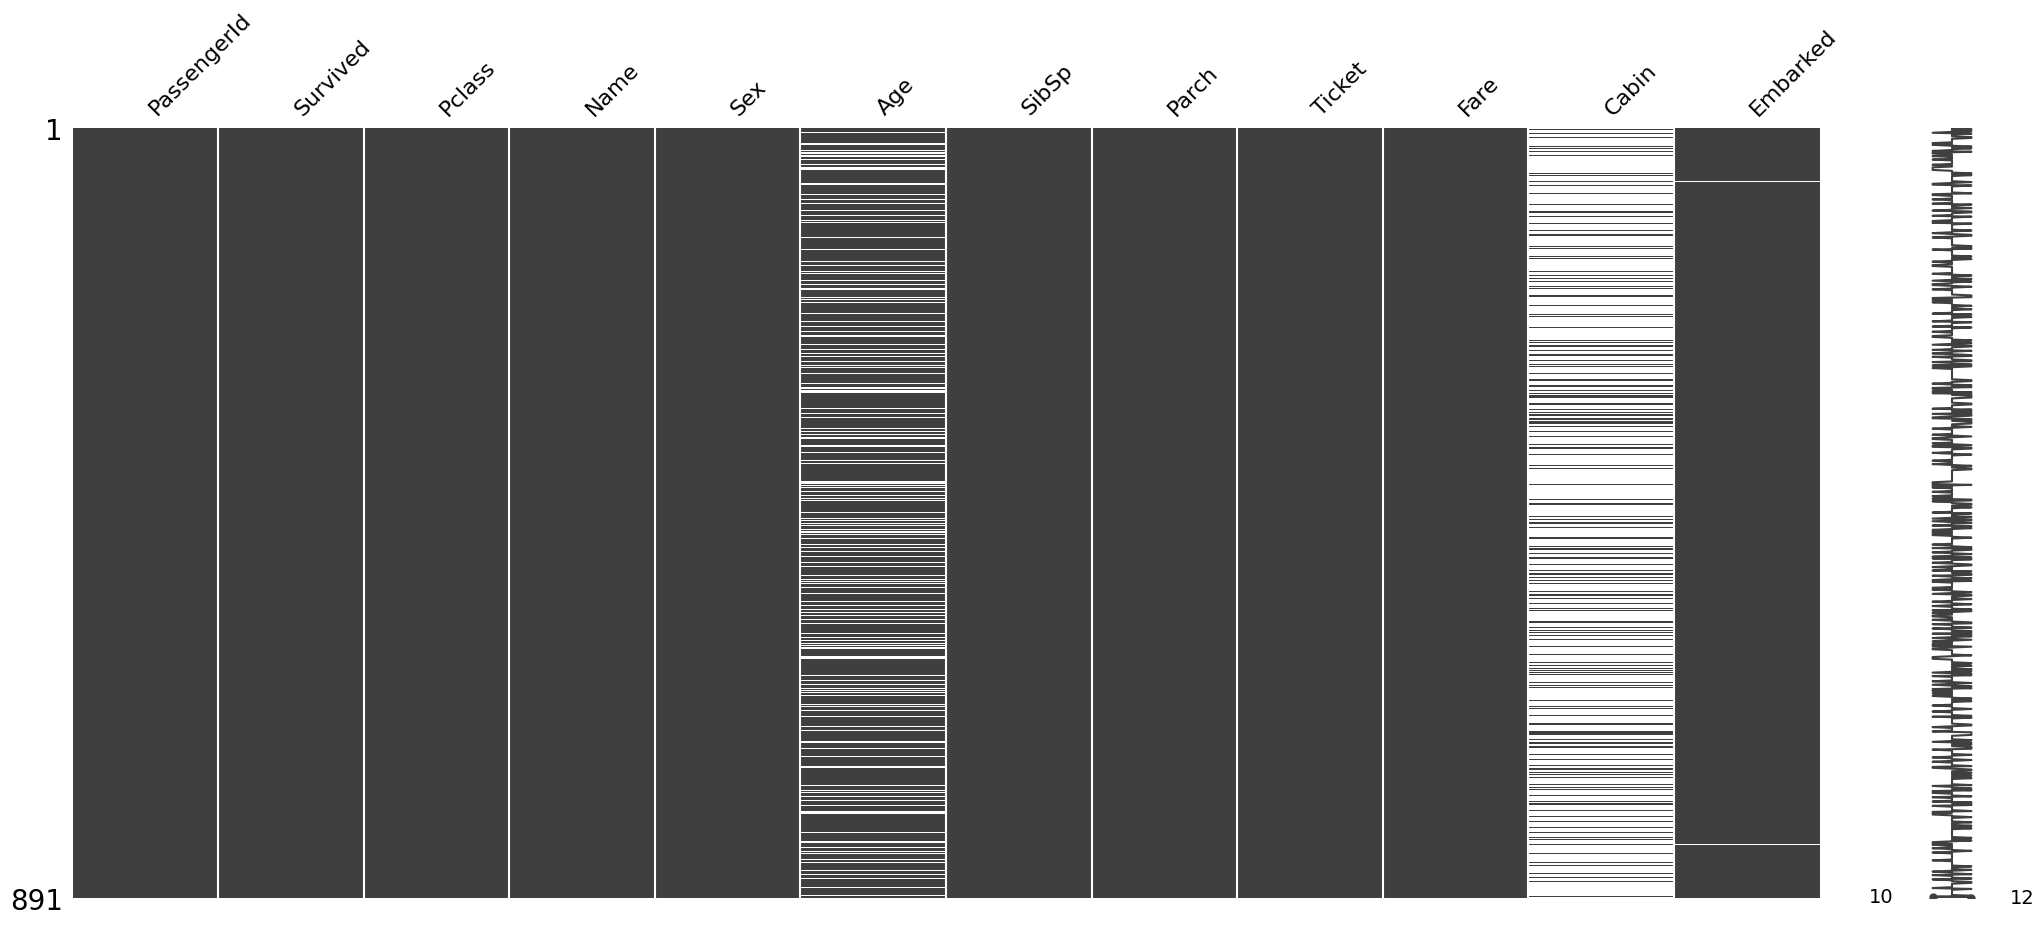

In [34]:
# Inspeccionar valores faltantes
titanic.isnull().sum()

# Visualizar patrón de valores faltantes
import missingno as msno  # pip install missingno
msno.matrix(titanic)

Las variables que muestran datos faltantes son edad y camarote y algunos dato de embarque. La gráfica nos permite ver de manera rápida que casi todos los valores del camaroteestán vacíos y hay algunos datos faltantes en edad, los datos faltantes en embarque son despreciables. Sin duda, esto es algo crítico para nuestra base de datos, pero no para fines de este análisis ya que son variables que no estamos utilizando, ya que estamos despreciando edad y género y nos estamos enfocando únicamente en clase social y precio pagado. Las tres variables usadas para este análisis están completas.

Si se desearan usar variables incompletas como lo es la edad, no es posible rellenar los datos con valores aleatorios ya que lograriamos imprecisión en los datos, y lo óptimo sería trabajar con la media y mediana de los mismos. De igual manera, la ubicación del camarote podría ser útil si se deseara realizar un análisis más profundo acerca de la arquitectura del barco, que camarotes eran asignados a la gente con los tickets más caros o con mayor clase social y cómo esto pudo influir en la evacuación del mismo, para rellenar esos datos faltantes podríamos apoyarnos de hechos históricos y enfocarnos en la letra de la cubierta ubicados y no estrictamente en el número del camarote. Sin embargo, para fines de este trabajo, no nos enfocaremos en los datos faltantes de variables irrelevantes para el mismo.

##*Parte 4 - Pregunta Original*

El análisis realizado del datset busca determinar si:

¿Una vida era considerada más valiosa según el dinero y clase social, por lo que pudieron tener acceso a mayores medidas de seguridad que permitieron su supervivencia?

Históricamente, podemos darnos cuenta de las brechas entre clases sociales y con este análisis nos damos cuenta que esta tragedia no se libró de tenerlas. Ya sea por varias raszones, pudimos confirmar que las personas con mayor clase social, y por ende, las que más pagaron por su boleto tuvieron una mayor tasa de supervivencia. Lo cuál puede ser atribuido a la arquitectura y distribución del barco, dónde dejaron a los más pobres en la parte más baja o en camarotes sin posibilidades de huir, lo cuál podríamos comprobarlo analizando la variable del número de camarote, confirmando que la posición del mismo tuvo influencia en la supervivencia de las personas.

Sin embargo, a partir de este análisis nos pueden surgir nuevas preguntas interesantes relacionadas al mismo como:

**¿El pagar una tarifa más alta que el promedio dentro de tu clase social influyó en las posibilidades de supervivencia?**

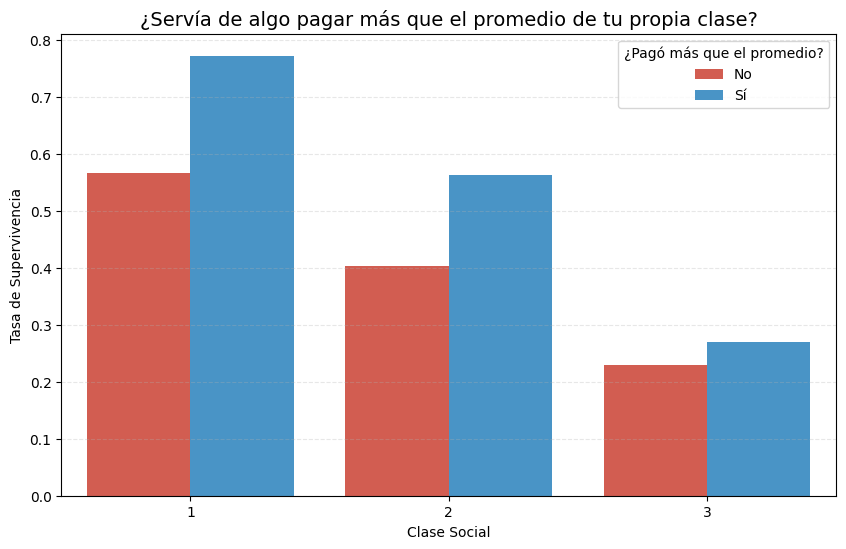

In [44]:
plt.figure(figsize=(10, 6))

sns.barplot(data=titanic, x='Pclass', y='Survived', hue='IsPremium',
            palette=['#E74C3C', '#3498DB'], hue_order=[False, True], errorbar=None)

plt.title('¿Servía de algo pagar más que el promedio de tu propia clase?', fontsize=14)
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Clase Social')

plt.legend(title='¿Pagó más que el promedio?', labels=['No', 'Sí'])

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Con esta gráfica surgida como respuesta a nuestra pregunta, podemos concluir en que las personas que pagaron un precio mayor al promedio de los boletos correspondientes a su clase social, sí tuvieron una mayor tasa de supervivencia, reafirmando nuestra hipótesis original de que el dinero compró la vida de muchos pasajeros.

Podemos recalcar que esto puede deberse a varios factores ajenos como la ubicación del camarote, los protocolos de evacuación, la facilidad de lanchas, la prioridad que se les dio a ciertas personas. Pero podemos decir firmemente que entre mayor fue el pago, y mayor fue la clase social, mayor fue la posibilidad de sobrevivir.

##*Reflexión Final*

Sobre el proceso, entendí que a veces la formulación de hipótesis iniciales no corresponderá a los datos brindados por el datset y que es importante ir haciendo ajustes, tanto de los datos como de las preguntas para poder llegar a una conlusión sólida, agregando factores que no se habían considerado antes, o decidiendo que tan utiles son algunas variables que en un inicio se habían definido. Sin duda, es un proceso tardado y que requiere mucho pensamiento, observación y análisis, observando el comportamiento de cada dato e ir eligiendo cuales son los mejores ajustes según nuestras necesidades, sin embargo, es algo muy interesante al final cuando ves que un dato es mucho más que un simple número o categoría y que te puede decir todo acerca de un tema en específico.

Considero que lo más díficil fue ir haciendo ajustes y descartar gráficas que sólo me generaban ruido. Es decir, ser selectiva con los valores usados para no tener datos basura que solo me revolvieran, y buscar ser lo más simple con las variables que trabajé.